In [17]:
from cmath import nan
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from helpers_DF import *
import time

In [18]:
softening=1e-6
k=8.9875517923*1e9

info = np.loadtxt('E_field/info.txt')
convert_dist=info[1] 
convert_E=info[2]
convert_vel=info[3]

prob = np.loadtxt('E_field/prob.txt')
ri = np.loadtxt('E_field/r.txt')*convert_dist  # r initial condition
zi = np.loadtxt('E_field/z.txt')*convert_dist  # z initial condition
vri = np.loadtxt('E_field/v_r.txt')*convert_vel # vr initial condition
vzi = np.loadtxt('E_field/v_z.txt')*convert_vel # vz initial condition

# Load the csv file
df = pd.read_csv('E_field/Fields.csv')
# Convert the DataFrame to a numpy array
Field = df.values
r=Field[:,0]*convert_dist
z=Field[:,1]*convert_dist
Er=Field[:,2]*convert_E
Ez=Field[:,3]*convert_E

interp=triangulation (r,z,Er,Ez)




In [19]:
dt=5e-12
Pneut=0
Pmono=40
Pdim=40
Ptrim=20

In [44]:
N_values = list(range(100, 1001, 100)) + list(range(2000, 10001, 1000))+ list(range(20000, 100001, 10000))
times = []
N_FMM = []
print(N_values)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]


In [45]:
for N in N_values:
    start_time = time.time()
    species, pos_save, IC = DF_nbody(dt, N, prob, ri, zi, vri, vzi, Pneut, Pmono, Pdim, Ptrim, softening, k, interp)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    print(f"Elapsed time for N={N}: {elapsed_time} seconds")
    
    zz = pos_save[:,2,-1]*1e6
    N_poisson=np.sum(zz<5)*10 +np.sum((zz > 5) & (zz <= 250))/10
    N_FMM.append(N_poisson)



Elapsed time for N=100: 0.09811711311340332 seconds
Elapsed time for N=200: 0.05964994430541992 seconds
Elapsed time for N=300: 0.10358500480651855 seconds
Elapsed time for N=400: 0.16151976585388184 seconds
Elapsed time for N=500: 0.22151494026184082 seconds
Elapsed time for N=600: 0.2978973388671875 seconds
Elapsed time for N=700: 0.3776099681854248 seconds
Elapsed time for N=800: 0.4536299705505371 seconds
Elapsed time for N=900: 0.5522069931030273 seconds
Elapsed time for N=1000: 0.662945032119751 seconds
Elapsed time for N=2000: 2.1095969676971436 seconds
Elapsed time for N=3000: 3.9539127349853516 seconds
Elapsed time for N=4000: 6.053529262542725 seconds
Elapsed time for N=5000: 8.164003133773804 seconds
Elapsed time for N=6000: 11.401145935058594 seconds
Elapsed time for N=7000: 13.894564151763916 seconds
Elapsed time for N=8000: 16.407877206802368 seconds
Elapsed time for N=9000: 19.642251014709473 seconds
Elapsed time for N=10000: 23.59584879875183 seconds
Elapsed time for N=

KeyboardInterrupt: 

In [63]:
N_values = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000])
N_values

array([  100,   200,   300,   400,   500,   600,   700,   800,   900,
        1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 20000])

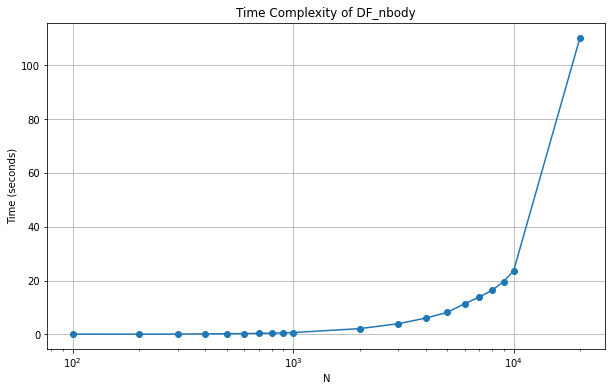

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, times, marker='o')
plt.xlabel('N')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of DF_nbody')
plt.grid(True)
plt.xscale('log')
plt.show()

In [55]:
np.size(N_values)

29

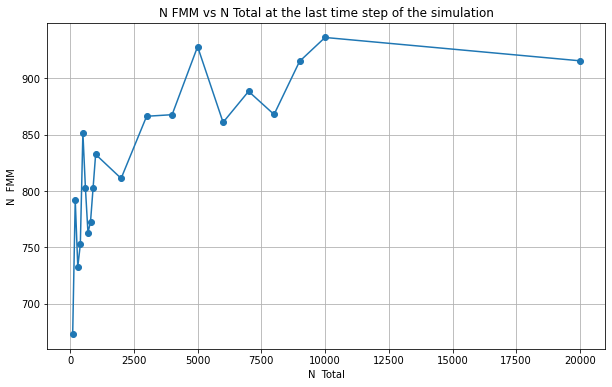

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(N_values, N_FMM, marker='o')
plt.xlabel('N  Total')
plt.ylabel('N  FMM')
plt.title('N FMM vs N Total at the last time step of the simulation')
plt.grid(True)
plt.show()

In [65]:
N_FMM

[673.2,
 792.1,
 732.8,
 752.7,
 851.8,
 802.4,
 762.9,
 772.9,
 802.7,
 832.5,
 811.2,
 866.3,
 867.7,
 928.1,
 860.9,
 888.4,
 867.9,
 915.0,
 936.2,
 915.5]